# **LangGraph Introduction:**

**LangGraph** is a **visualization and debugging tool** designed for LangChain workflows. It provides an intuitive way to **visualize chains, agents, and components** by representing them as graphs. This graphical representation helps developers understand, debug, and optimize their LangChain-based pipelines.<br><br>



**Why is LangGraph Required?**<br>
1. **Complex Workflow Debugging:** LangChain pipelines can involve multiple chains, agents, and tools. LangGraph visually simplifies these complex workflows.
2. **ptimization:** It helps developers identify bottlenecks and inefficiencies in their pipelines.
3. **Error Tracing:** LangGraph makes it easier to pinpoint errors and debug specific parts of the workflow.
4. **etter Collaboration:** Teams can use visual graphs to explain and share pipeline designs



In [ ]:
# install necessary libaries:

%pip install --upgrade --quiet sentence_transformers
%pip install --upgrade --quiet  langchain langchain-community langchainhub langchain-google-genai langchain-chroma bs4 boto3
%pip install --upgrade --quiet langchain-aws
%pip install --upgrade --quiet langgraph langsmith langchain_anthropic

## **Example 01: Simple Workflow:**

In [ ]:
# Create Function or Component or node:

def function_1(input_1):
    return input_1 + " First Function --> "

def function_2(input_2):
    return input_2 + "to Second Function"

In [ ]:
from langgraph.graph import Graph

# Define a Langchain graph
# Create a Workflow:
workflow1 = Graph()


# Add nodes to Workflow:
workflow1.add_node("Node_1", function_1)
workflow1.add_node("Node_2", function_2)


# Add Edges (data flow between two nodes):
workflow1.add_edge('Node_1', 'Node_2')


# Set an Entry Point or Start Point:
workflow1.set_entry_point("Node_1")

# Set an Exist Point or End Point:
workflow1.set_finish_point("Node_2")

# Render or Compile the graph
app = workflow1.compile()

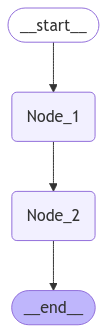

In [ ]:
app

In [ ]:
# Invoke:

app.invoke("I am moving from")

'I am moving from First Function --> to Second Function'

In [ ]:
# Stream:

input = 'I am moving from'
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'Node_1':
---
I am moving from First Function --> 

---

Output from node 'Node_2':
---
I am moving from First Function --> to Second Function

---



## **Example 02: Add one or more function inside a Node:**

Node itself is a collection of funcion:

In [ ]:
# others function:

def your_name():
  return "My name is Dibyendu Biswas."

In [ ]:
# Create Function or Component or node:

def function_1(input_1):
    return input_1 + " First Function --> "

def function_2(input_2):
    name = your_name()
    print(name)
    return input_2 + "to Second Function"

In [ ]:
from langgraph.graph import Graph

# Define a Langchain graph
# Create a Workflow:
workflow2 = Graph()


# Add nodes to Workflow:
workflow2.add_node("Node_1", function_1)
workflow2.add_node("Node_2", function_2)


# Add Edges (data flow between two nodes):
workflow2.add_edge('Node_1', 'Node_2')


# Set an Entry Point or Start Point:
workflow2.set_entry_point("Node_1")

# Set an Exist Point or End Point:
workflow2.set_finish_point("Node_2")

# Render or Compile the graph
app = workflow2.compile()

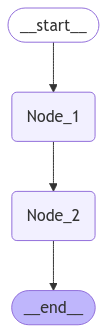

In [ ]:
app

In [ ]:
app.invoke("I am moving from")

My name is Dibyendu Biswas.


'I am moving from First Function --> to Second Function'

## **Example 03: Integrating LLM call in the LangGraph**

### **Load LLM:**

In [ ]:
# Load the Tokens:

from google.colab import userdata
import os

os.environ['GOOGLE_API_KEY'] = userdata.get('GEMINI_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

def load_llm():
  llm = llm = ChatGoogleGenerativeAI(
    model="gemini-1.0-pro",
    temperature=0.4
  )
  return llm

llm = load_llm()
print(llm.invoke("hi").content)

Hello there! How can I assist you today?


### **Create LangGraph Workflow:**

In [ ]:
# Create Function or Component or node:

def generate_response(query):
  llm = load_llm()
  return llm.invoke(query).content

def Convert_Upper(response):
    return response.upper()

In [ ]:
from langgraph.graph import Graph

# Define a Langchain graph
# Create a Workflow:
workflow3 = Graph()


# Define Node:
workflow3.add_node("Generate_Response", generate_response)
workflow3.add_node("Convert_Upper_Case", Convert_Upper)


# Add Edges (data flow between two nodes):
workflow3.add_edge('Generate_Response', 'Convert_Upper_Case')


# Set an Entry Point or Start Point:
workflow3.set_entry_point("Generate_Response")

# Set an Exist Point or End Point:
workflow3.set_finish_point("Convert_Upper_Case")


app3 = workflow3.compile()

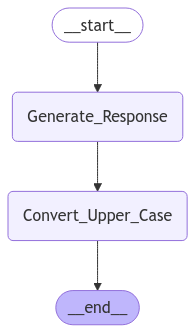

In [ ]:
app3

In [ ]:
app3.invoke("What is AI?")

'**ARTIFICIAL INTELLIGENCE (AI)**\n\nARTIFICIAL INTELLIGENCE (AI) REFERS TO THE DEVELOPMENT OF COMPUTER SYSTEMS THAT CAN PERFORM TASKS THAT TYPICALLY REQUIRE HUMAN INTELLIGENCE, SUCH AS LEARNING, PROBLEM-SOLVING, DECISION-MAKING, AND NATURAL LANGUAGE PROCESSING.\n\n**KEY CHARACTERISTICS OF AI:**\n\n* **LEARNING:** AI SYSTEMS CAN LEARN FROM DATA, IDENTIFY PATTERNS, AND MAKE PREDICTIONS.\n* **REASONING:** AI CAN USE LOGICAL RULES AND INFERENCE TO DRAW CONCLUSIONS AND MAKE DECISIONS.\n* **PROBLEM-SOLVING:** AI CAN ANALYZE COMPLEX PROBLEMS, GENERATE SOLUTIONS, AND EVALUATE THEIR EFFECTIVENESS.\n* **NATURAL LANGUAGE PROCESSING:** AI CAN UNDERSTAND, INTERPRET, AND GENERATE HUMAN LANGUAGE.\n* **COGNITIVE ABILITIES:** AI MIMICS HUMAN COGNITIVE FUNCTIONS, SUCH AS PERCEPTION, MEMORY, AND ATTENTION.\n\n**TYPES OF AI:**\n\n* **MACHINE LEARNING:** AI SYSTEMS THAT LEARN FROM DATA WITHOUT EXPLICIT PROGRAMMING.\n* **DEEP LEARNING:** A SUBSET OF MACHINE LEARNING THAT USES ARTIFICIAL NEURAL NETWORKS TO 

In [ ]:
app3.invoke("What is the Capital of India?")

'NEW DELHI'

In [ ]:
query = "What is AI?"
for output in app3.stream(query):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'Generate_Response':
---
Artificial Intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think like humans and perform tasks that would normally require human intelligence. It involves the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, decision-making, and natural language processing. AI systems are designed to mimic human cognitive functions and can be applied to a wide range of tasks, including image and speech recognition, language translation, game playing, and medical diagnosis.

---

Output from node 'Convert_Upper_Case':
---
ARTIFICIAL INTELLIGENCE (AI) REFERS TO THE SIMULATION OF HUMAN INTELLIGENCE IN MACHINES THAT ARE PROGRAMMED TO THINK LIKE HUMANS AND PERFORM TASKS THAT WOULD NORMALLY REQUIRE HUMAN INTELLIGENCE. IT INVOLVES THE DEVELOPMENT OF COMPUTER SYSTEMS THAT CAN PERFORM TASKS THAT TYPICALLY REQUIRE HUMAN INTELLIGENCE, SUC

## **Example 04: Integrating LLM & RAG in the LangGraph**

In [ ]:
# Load the Tokens:

from google.colab import userdata
import os

os.environ['GOOGLE_API_KEY'] = userdata.get('GEMINI_API_KEY')
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')

### **Load LLM:**

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

def load_llm():
  llm = llm = ChatGoogleGenerativeAI(
    model="gemini-1.0-pro",
    temperature=0.4
  )
  return llm

llm = load_llm()
print(llm.invoke("hi").content)

Hello! How can I help you today?


### **Load Embeddings from HF:**

In [ ]:
%pip install sentence-transformers

In [ ]:
# Get the Embeddings:

from langchain.embeddings import HuggingFaceEmbeddings

model_name = "sentence-transformers/all-MiniLM-L6-v2"
embeddings = HuggingFaceEmbeddings(model_name=model_name)

### **Vector Store & Retriever:**

In [ ]:
import bs4
from langchain import hub
from langchain_chroma import Chroma
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
# Load, chunk and index the contents of the blog.
loader = WebBaseLoader("https://docs.smith.langchain.com/overview")
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

In [ ]:
# retriever:

retriever = vectorstore.as_retriever(search_kwargs=dict(k=5))

In [ ]:
retriever.get_relevant_documents("what is langchain?")

### **LangGraph Integration:**

#### **Create or Define Functions:**

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain.chains import RetrievalQA

In [ ]:
# LLM Integration for Generating Responses:

def function_1(state):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question

    complete_query = "Your task is to provide only the topic based on the user query. \
        Only output the topic among: [Japan , Sports]. Don't include reasoning. Following is the user query: " + question

    response = llm.invoke(complete_query)
    state['messages'].append(response.content) # appending LLM call response to the AgentState
    return state


# RAG Pipeline:
def function_2(state):
    messages = state['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    # prompt = ChatPromptTemplate.from_template(template)
    prompt = PromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

#### **Define LangGraph Workflow:**

In [ ]:
from langgraph.graph import Graph

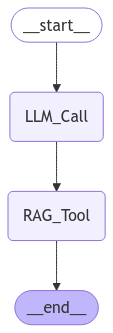

In [ ]:
# Define a Langchain graph
workflow4 = Graph()

# Add Node to Workflow:
workflow4.add_node("LLM_Call", function_1)
workflow4.add_node("RAG_Tool", function_2)

# Define Data flow:
workflow4.add_edge('LLM_Call', 'RAG_Tool')

# Set Entry/Start and Exist/End Point:
workflow4.set_entry_point("LLM_Call")
workflow4.set_finish_point("RAG_Tool")

# Render or Compile the graph
app4 = workflow4.compile()
app4

In [ ]:
# Invoking:

inputs = {"messages": ["Tell me about LangSmith"]}
app4.invoke(inputs)

'LangSmith is a platform designed for building production-grade LLM applications. It allows users to closely monitor and evaluate their applications, enabling them to ship quickly and with confidence. With LangSmith, users can:'

In [ ]:
# Invoking:

inputs = {"messages": ["Tell me about India"]}
app4.invoke(inputs)

'The provided context does not mention anything about India, so I cannot answer this question from the provided context.'

## **Example 05: Conditional Call (DAG)**

**Simplyfying the State Addition and Maintainence**

* Either **LLM Call** or **RAG Call**.

### **Load LLM:**

In [2]:
# Load the Tokens:

from google.colab import userdata
import os

os.environ['GOOGLE_API_KEY'] = userdata.get('GEMINI_API_KEY')
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

def load_llm():
  llm = llm = ChatGoogleGenerativeAI(
    model="gemini-1.0-pro",
    temperature=0.4
  )
  return llm

llm = load_llm()
print(llm.invoke("hi").content)

Hello there! How can I assist you today?


### **Load Embeddings from HF:**

In [ ]:
%pip install sentence-transformers

In [ ]:
# Get the Embeddings:

from langchain.embeddings import HuggingFaceEmbeddings

model_name = "sentence-transformers/all-MiniLM-L6-v2"
embeddings = HuggingFaceEmbeddings(model_name=model_name)

### **Vector Store & Retriever:**

In [6]:
import bs4
from langchain import hub
from langchain_chroma import Chroma
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter


# Load, chunk and index the contents of the blog.
loader = WebBaseLoader("https://docs.smith.langchain.com/overview")
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

In [7]:
# retriever:

retriever = vectorstore.as_retriever(search_kwargs=dict(k=5))

### **LangGraph Integration:**

In [8]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage

In [9]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [11]:
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate


class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    #Reasoning: str = Field(description='Reasoning behind topic selection')

parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)
parser

PydanticOutputParser(pydantic_object=<class '__main__.TopicSelectionParser'>)

In [12]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}}, "required": ["Topic"]}\n```'

#### **Create FUnction:**

In [31]:
# It's kind of Agent or Conditional Function:

def function(state):
    print('-> Calling Conditional Agent ->')
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question

    templete = """ Your task is to provide only the topic based on the user query. \
    Only output the topic among: [LangChain, LLM, Agent, LangSmith, Not Related]. \
    Don't include reasoning. \
    Following is the user query:  {question} \
    {format_instructions} """
    prompt = PromptTemplate(template=templete,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain = prompt | llm | parser

    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [32]:
# RAG Function or RAG Component:

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain.chains import RetrievalQA


def function_1(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = PromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [33]:
# LLM Call Function or LLM Call Component:

def function_2(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [34]:
# Create a Router Function which route the Component/Function call in the Acyclic Graph:

def router(state):
    print('-> Router ->')

    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'LangChain' in last_message or 'LLM' in last_message or 'Agent' in last_message  or 'LangSmith' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

#### **Define the Workflows of LangGraph:**

In [35]:
from langgraph.graph import StateGraph, END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState

# Add Nodes:
workflow5.add_node("Conditional_Agent", function)
workflow5.add_node("RAG", function_1)
workflow5.add_node("LLM", function_2)


# Set Entry Point:
workflow5.set_entry_point("Conditional_Agent")


# Define conditional Edges are controlled by our router:
workflow5.add_conditional_edges(
    "Conditional_Agent",  # where in graph to start
    router,  # function to determine which node is called
    {
        'RAG Call': "RAG",
        'LLM Call': "LLM",
    }
)


# Add edges: RAG -> END and LLM -> END
workflow5.add_edge("RAG", END)
workflow5.add_edge("LLM", END)


app5 = workflow5.compile()

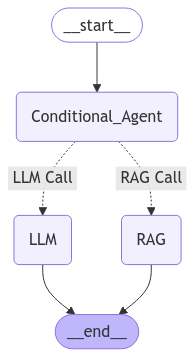

In [36]:
app5

In [37]:
inputs = {"messages": ["Tell me about LangSmith"]}
out = app5.invoke(inputs)

-> Calling Conditional Agent ->
Topic='LangSmith'
-> Router ->
LangSmith
-> Calling RAG ->


In [38]:
out

{'messages': ['Tell me about LangSmith',
  'LangSmith',
  'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence.']}

In [39]:
inputs = {"messages": ["Tell me about India"]}
out = app5.invoke(inputs)

-> Calling Conditional Agent ->
Topic='Not Related'
-> Router ->
Not Related
-> Calling LLM ->


In [42]:
from IPython.display import display, Markdown

display(Markdown(out['messages'][-1]))

**Geography:**

* Located in South Asia, bordered by Pakistan, China, Nepal, Bhutan, Bangladesh, and Myanmar
* Seventh-largest country by area, with a land area of 3.287 million square kilometers
* Diverse landscape, including the Himalayas, the Thar Desert, and the Ganges River Delta

**Demographics:**

* Second-most populous country in the world, with a population of over 1.4 billion
* Diverse ethnic, linguistic, and religious groups
* Official languages are Hindi and English

**History:**

* Ancient civilization dating back to the Indus Valley Civilization (c. 3300-1900 BCE)
* Ruled by various empires throughout history, including the Mauryan, Gupta, Mughal, and British
* Gained independence from British rule in 1947

**Politics:**

* Parliamentary republic with a federal structure
* Head of state: President
* Head of government: Prime Minister
* Multi-party system, with the Bharatiya Janata Party (BJP) currently in power

**Economy:**

* Sixth-largest economy in the world by nominal GDP
* Rapidly growing economy, with a focus on services, manufacturing, and agriculture
* Major industries include IT, pharmaceuticals, textiles, and automotive

**Culture:**

* Rich and diverse cultural heritage
* Known for its vibrant festivals, music, dance, and literature
* Home to many religions, including Hinduism, Islam, Christianity, Sikhism, and Buddhism

**Other Notable Facts:**

* World's largest producer of milk, tea, and spices
* Home to the Taj Mahal, one of the Seven Wonders of the World
* Has a strong space program, with successful missions to the moon and Mars
* Facing challenges such as poverty, inequality, and environmental pollution